# **Cat and Dog Classifier**

# **Essential Libraries**

In [45]:
import pandas as pd
import numpy as np
import cv2 as cv
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential,save_model,load_model 
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
import matplotlib.pyplot as plt  
import seaborn as sns
import cv2

# **Preprocessing**

In [23]:
train=keras.utils.image_dataset_from_directory(
    directory=r"/kaggle/input/dogs-vs-cats/train",
    labels='inferred',
    label_mode='int',
    batch_size=10,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [24]:
test=keras.utils.image_dataset_from_directory(
    directory=r"/kaggle/input/dogs-vs-cats/test",
    labels='inferred',
    label_mode='int',
    batch_size=10,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


# **Normalization**

In [28]:
def norm(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label


In [29]:
train=train.map(norm)
test=test.map(norm)

# **CNN Model**

In [55]:
model = Sequential()

model.add(Conv2D(130,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(60,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 130)     3640      
                                                                 
 batch_normalization_18 (Ba  (None, 254, 254, 130)     520       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 130)     0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 60)      70260     
                                                                 
 batch_normalization_19 (Ba  (None, 125, 125, 60)      240       
 tchNormalization)                                               
                                                      

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
backend=model.fit(train,validation_data=test,epochs=4)

Epoch 1/4
2000/2000 [==============================] - 145s 70ms/step - loss: 0.7507 - accuracy: 0.5989 - val_loss: 0.7120 - val_accuracy: 0.5536
Epoch 2/4
2000/2000 [==============================] - 140s 70ms/step - loss: 0.6106 - accuracy: 0.6687 - val_loss: 0.5776 - val_accuracy: 0.6822
Epoch 3/4
2000/2000 [==============================] - 140s 70ms/step - loss: 0.5389 - accuracy: 0.7289 - val_loss: 0.4973 - val_accuracy: 0.7662
Epoch 4/4
2000/2000 [==============================] - 140s 70ms/step - loss: 0.4623 - accuracy: 0.7836 - val_loss: 0.5424 - val_accuracy: 0.7526


# **Visualize the CNN Model's outputs**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


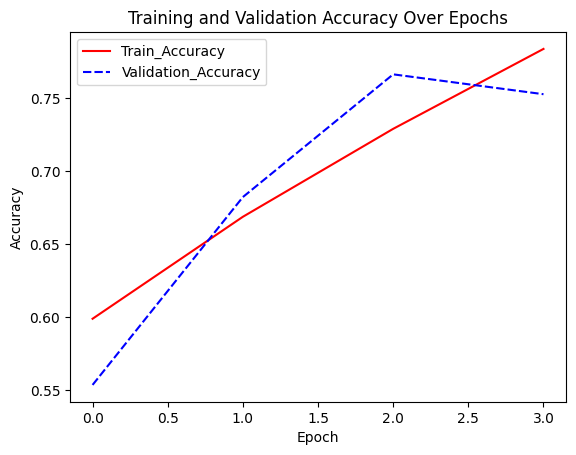

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


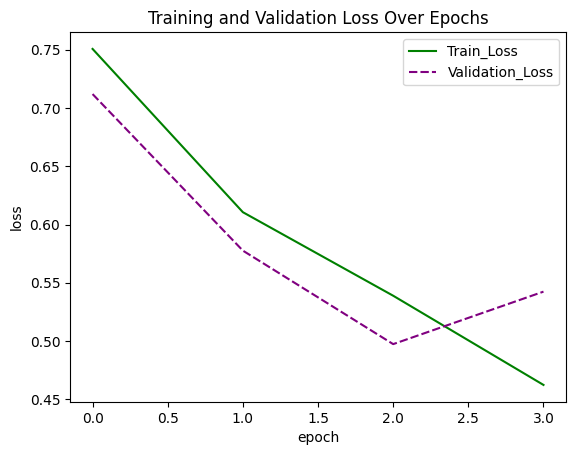

In [58]:
model_accuracy=pd.DataFrame({"Train_Accuracy":backend.history["accuracy"],"Validation_Accuracy":backend.history["val_accuracy"]})

sns.lineplot(data=model_accuracy,palette=['red','blue'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

model_loss=pd.DataFrame({"Train_Loss":backend.history["loss"],"Validation_Loss":backend.history["val_loss"]})

sns.lineplot(data=model_loss,palette=['green','purple'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# **Test the Model on images of cat and dog**

In [61]:
test_img = cv2.imread('/kaggle/input/cat-image/cat.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

prediction=model.predict(test_input)

if prediction[0][0]<0.5:
    print("Cat")
else:
    print("Dog")


1/1 [==============================] - 0s 19ms/step
Cat


# **Save The Model**

In [62]:
model.save('Cat_and_Dog_classifier.h5') 

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
